In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
df=pd.read_excel('/content/nykaa_copy - Copy.xlsx')

In [28]:
df.head()

,Order_ID,Customer_ID,Order_Date,Year_Month,Month,Month_Number,Product_ID,Product_Name,Brand,Category,Sub_Category,Price,Quantity,Total_Value,Payment_Method,Delivery_City,Delivery_State,Delivery_Status,Rating
0,NYK1000000,CUST15796,2023-10-20,2023-10,October,10,PRD1860,Revlon Lipstick,Revlon,Makeup,Lipstick,565.29,3,1695.87,Debit Card,Vijayawada,Jharkhand,Cancelled,1.4
1,NYK1000001,CUST44733,2025-07-25,2025-07,July,7,PRD6734,The Body Shop Blush,The Body Shop,Makeup,Blush,160.39,3,481.17,Credit Card,Aizawl,Maharashtra,Delivered,1.9
2,NYK1000002,CUST16851,2023-10-15,2023-10,October,10,PRD5426,Loreal Paris Blush,Loreal Paris,Makeup,Blush,1460.44,2,2920.88,Cash on Delivery,Haldia,Jharkhand,Returned,1.9
3,NYK1000003,CUST47192,2023-12-16,2023-12,December,12,PRD9322,MCaffeine Shampoo,Mcaffeine,Haircare,Shampoo,1426.46,3,4279.38,UPI,Korba,Odisha,Returned,1.6
4,NYK1000004,CUST00770,2025-02-07,2025-02,February,2,PRD7949,MyGlamm Shampoo,MyGlamm,Haircare,Shampoo,821.86,2,1643.72,UPI,Indore,Kerala,Returned,3.4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Order_ID         101000 non-null  object        
 1   Customer_ID      101000 non-null  object        
 2   Order_Date       101000 non-null  datetime64[ns]
 3   Year_Month       101000 non-null  object        
 4   Month            101000 non-null  object        
 5   Month_Number     101000 non-null  int64         
 6   Product_ID       101000 non-null  object        
 7   Product_Name     101000 non-null  object        
 8   Brand            101000 non-null  object        
 9   Category         101000 non-null  object        
 10  Sub_Category     101000 non-null  object        
 11  Price            101000 non-null  float64       
 12  Quantity         101000 non-null  int64         
 13  Total_Value      101000 non-null  float64       
 14  Payment_Method   101

In [30]:
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Order_Date,0
Year_Month,0
Month,0
Month_Number,0
Product_ID,0
Product_Name,0
Brand,0
Category,0


In [31]:
total_revenue = df['Total_Value'].sum()
distinct_orders = df['Order_ID'].nunique()
distinct_customers = df['Customer_ID'].nunique()
aov = total_revenue / distinct_orders
repeat_rate = (df.groupby('Customer_ID')['Order_ID'].nunique() > 1).mean()

In [32]:
print(f"Total revenue: {total_revenue:.2f}")
print(f"Distinct orders: {distinct_orders}")
print(f"AOV: {aov:.2f}")
print(f"Repeat purchase rate: {repeat_rate:.2%}")

Total revenue: 264399211.35
Distinct orders: 100000
AOV: 2643.99
Repeat purchase rate: 69.02%


In [33]:
import matplotlib.pyplot as plt

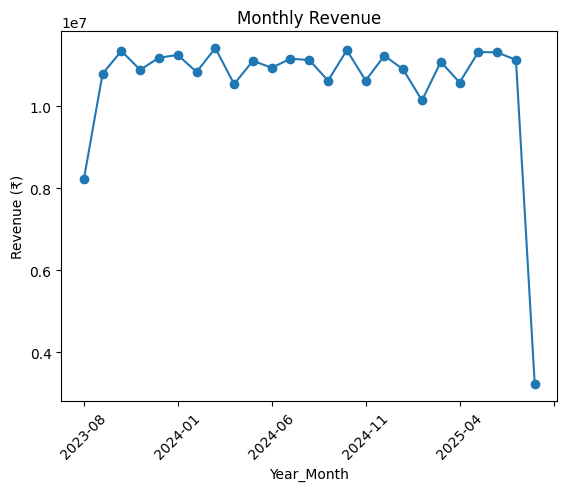

In [34]:
# Monthly Revenue
df.groupby('Year_Month')['Total_Value'].sum().plot(kind='line', marker='o')
plt.title("Monthly Revenue")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2107201799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")


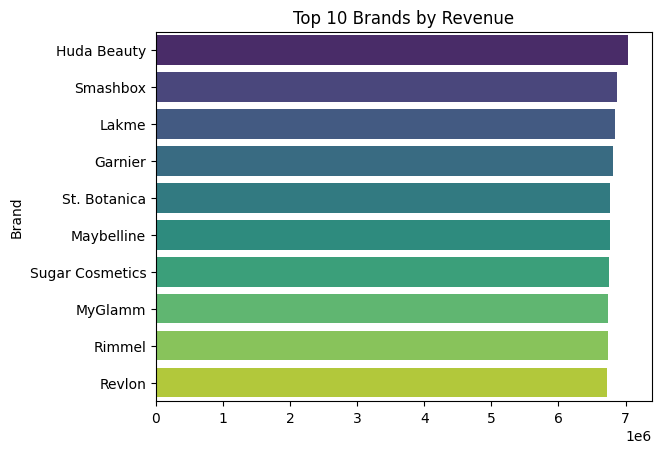

In [35]:
# Top 10 Brands
top_brands = df.groupby('Brand')['Total_Value'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title("Top 10 Brands by Revenue")
plt.show()

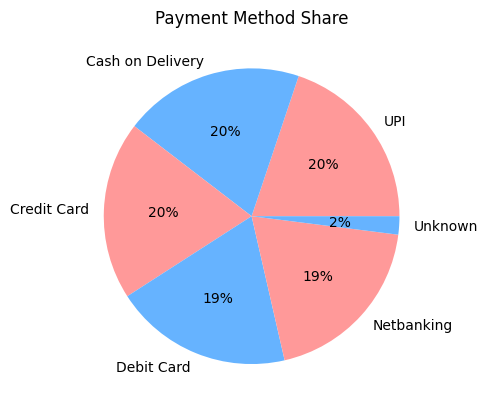

In [36]:
#Payment Method Share
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['#ff9999','#66b3ff'])
plt.title("Payment Method Share")
plt.ylabel("")
plt.show()

/tmp/ipython-input-3709134332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_brand.values, y=avg_rating_brand.index, palette="mako")


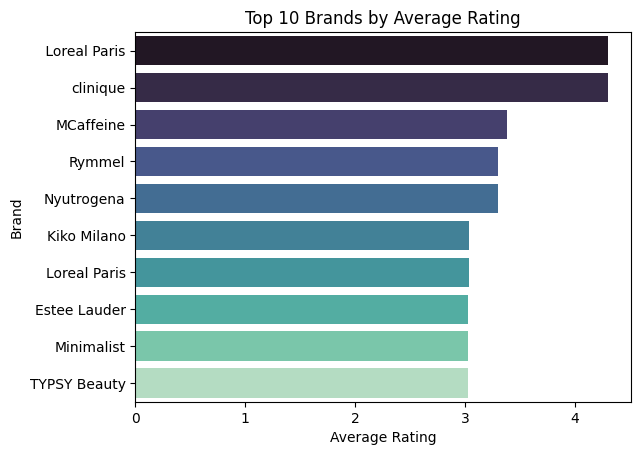

In [37]:
#Brand vs. Rating
avg_rating_brand = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_brand.values, y=avg_rating_brand.index, palette="mako")
plt.title("Top 10 Brands by Average Rating")
plt.xlabel("Average Rating")
plt.show()

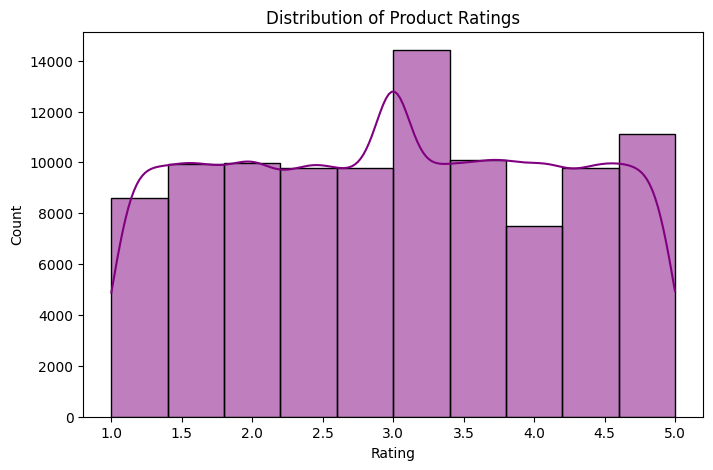

In [38]:
# Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True, color='purple')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3520379821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")


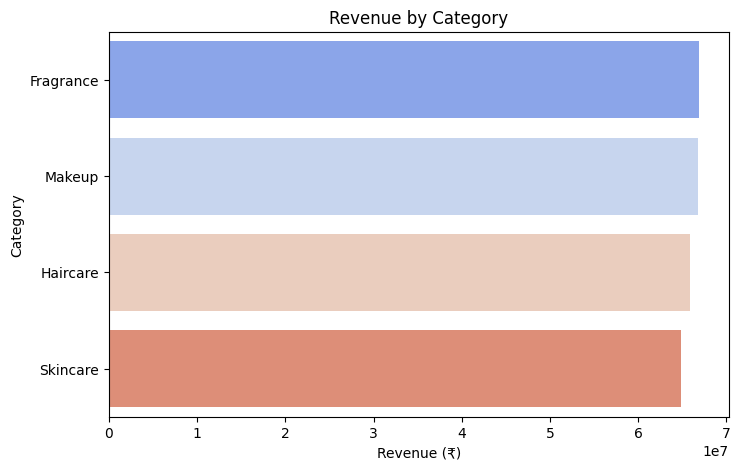

In [39]:
#Revenue by Category
plt.figure(figsize=(8,5))
category_revenue = df.groupby('Category')['Total_Value'].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")
plt.title("Revenue by Category")
plt.xlabel("Revenue (₹)")
plt.ylabel("Category")
plt.show()

/tmp/ipython-input-1822105485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_brand.values, y=avg_rating_brand.index, palette="mako")


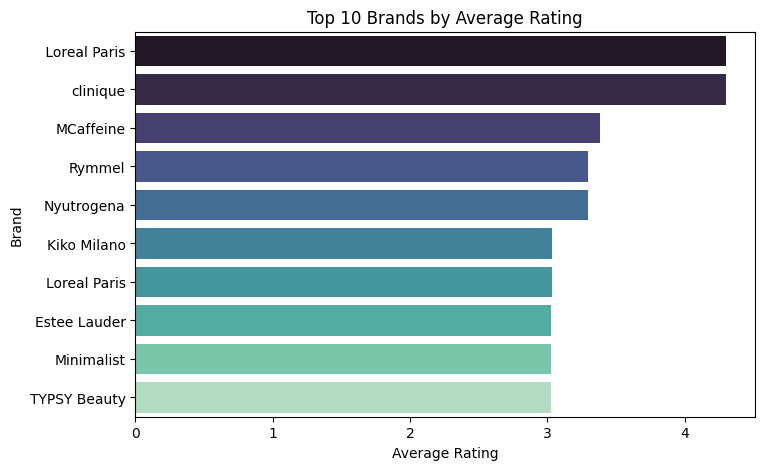

In [41]:
# Top 10 Brands by Average Rating
plt.figure(figsize=(8,5))
avg_rating_brand = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_brand.values, y=avg_rating_brand.index, palette="mako")
plt.title("Top 10 Brands by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.show()

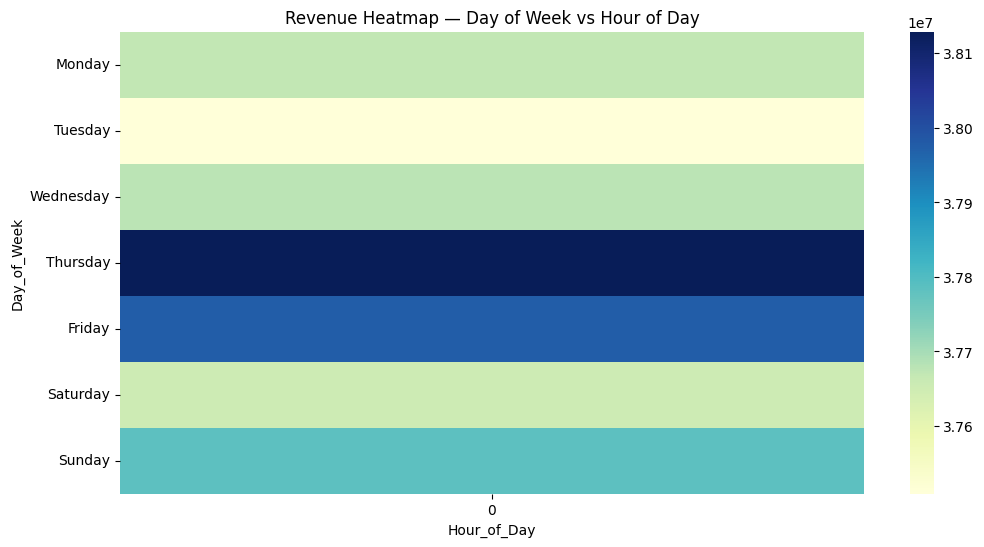

In [43]:
# Extract day of week and hour from 'Order_Date'
df['Day_of_Week'] = df['Order_Date'].dt.day_name()
df['Hour_of_Day'] = df['Order_Date'].dt.hour

# Create pivot table for heatmap
pivot_time = df.pivot_table(values='Total_Value', index='Day_of_Week', columns='Hour_of_Day', aggfunc='sum')

#Order days logically
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot_time = pivot_time.reindex(day_order)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_time, cmap="YlGnBu", annot=False)
plt.title("Revenue Heatmap — Day of Week vs Hour of Day")
plt.show()

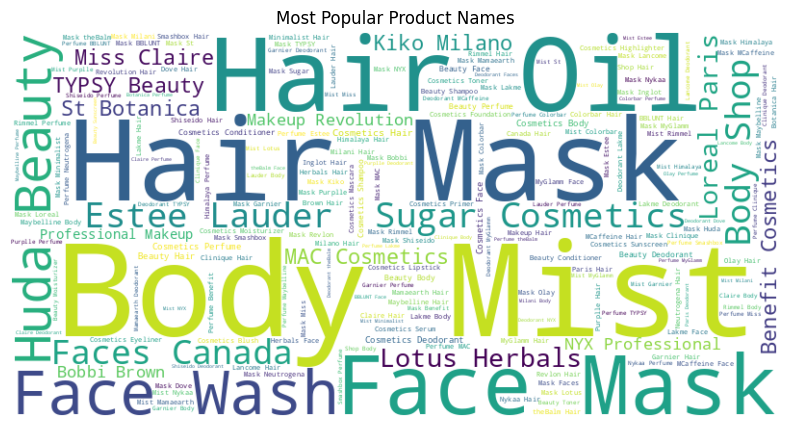

In [44]:
from wordcloud import WordCloud

text = " ".join(df['Product_Name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Popular Product Names")
plt.show()